##  Load the MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(f"Training the data shape :{x_train.shape},labels:{y_train.shape}")
print(f"Testing the data shape : {x_test.shape},Labels:{y_test.shape}")

Training the data shape :(60000, 28, 28),labels:(60000,)
Testing the data shape : (10000, 28, 28),Labels:(10000,)


# Step 2: Visualizing the Data

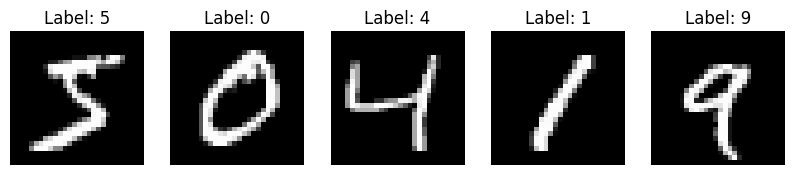

In [4]:
plt.figure(figsize=(10,5))


for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

# Step 3: Preprocessing the Data

In [5]:
# Before feeding the images into a neural network, we normalize them.
# 👉 Since pixel values range from 0 to 255, we scale them to 0-1 for better training.

In [6]:
# Normalize pixel values (convert 0-255 to 0-1)
x_train = x_train /255.0
y_train = x_test / 255.0

# Step 4: Building a Simple Neural Network

In [7]:
# Import Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array (784 pixels)
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons (ReLU activation)
    Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ flatten (Flatten)             │ (None, 784)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │      100,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Training the Model 🚀

In [8]:
# Train the model

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")



x_train shape: (60000, 28, 28)
y_train shape: (10000, 28, 28)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
from tensorflow.keras.datasets import mnist

# Load MNIST again (to fix any accidental changes)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.4237 - val_accuracy: 0.9596 - val_loss: 0.1343
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9632 - loss: 0.1220 - val_accuracy: 0.9703 - val_loss: 0.1009
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9774 - loss: 0.0773 - val_accuracy: 0.9729 - val_loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9813 - loss: 0.0598 - val_accuracy: 0.9775 - val_loss: 0.0738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9875 - loss: 0.0437 - val_accuracy: 0.9752 - val_loss: 0.0738
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9904 - loss: 0.0328 - val_accuracy: 0.9778 - val_loss: 0.0739
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9926 - loss: 0.0252 - val_accuracy: 0.9759 - val_loss: 0.0782
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9941 - loss: 0.0206 - 

# Step 6: Evaluating the Model

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0950 

Test Accuracy: 0.9771
Test Loss: 0.0818


# Step 7: Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


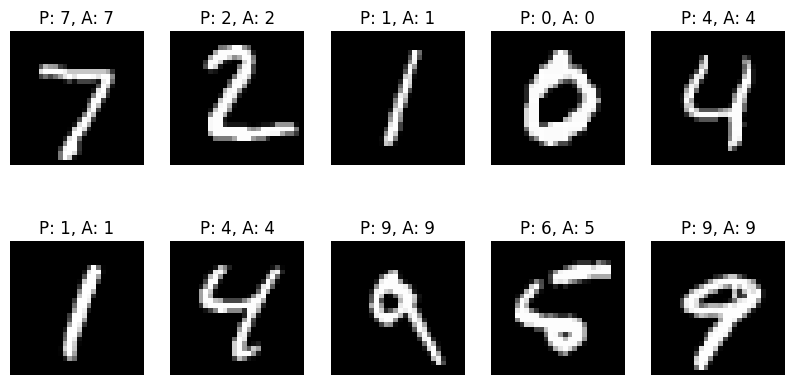

In [12]:
# Make predictions
predictions = model.predict(x_test)

# Show some sample predictions
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")  # Show the image
    predicted_label = np.argmax(predictions[i])  # Get the predicted class
    actual_label = y_test[i]  # Actual label
    plt.title(f"P: {predicted_label}, A: {actual_label}")  # Show prediction vs actual
    plt.axis("off")

plt.show()


# What’s Next? (Improving the Model)

In [13]:
from tensorflow.keras.layers import Dropout

# Create a deeper model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  # Increased neurons (256)
    Dropout(0.2),  # Helps prevent overfitting
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax')  
])

# Compile again
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train again
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 2️⃣ Use a Convolutional Neural Network (CNN) CNNs are better for image recognition. Want to try this? It can boost accuracy to 99%+! 🔥

#3️⃣ Hyperparameter Tuning We can tweak learning rates, batch size, and optimizers to find the best settings.



#What Do You Want to Do Next?
#Try a deeper model first?
#Upgrade to a CNN for pro-level accuracy?
#Or stop here and apply this knowledge to another dataset?

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8788 - loss: 0.4049 - val_accuracy: 0.9659 - val_loss: 0.1117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9670 - loss: 0.1100 - val_accuracy: 0.9742 - val_loss: 0.0856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0814 - val_accuracy: 0.9732 - val_loss: 0.0823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0620 - val_accuracy: 0.9774 - val_loss: 0.0742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0559 - val_accuracy: 0.9809 - val_loss: 0.0684
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0442 - val_accuracy: 0.9777 - val_loss: 0.0787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0443 - val_accuracy: 0.9807 - val_loss: 0.0710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0364 - 

In [14]:
# 💥 Let’s Go! Time to Build a CNN (Convolutional Neural Network)! 🚀

# Why CNN?
# CNNs are designed for image recognition and work much better than simple dense networks for MNIST. They:
# ✅ Extract features from images (like edges, curves, etc.).
# ✅ Improve accuracy (99%+ possible).
# ✅ Are used in real-world AI applications (face recognition, self-driving cars, etc.).

# Step 1: Import CNN Layers

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape data for CNN (CNN needs 4D input: (samples, height, width, channels))
x_train_cnn = x_train.reshape(-1, 28, 28, 1)  # Add channel (1 for grayscale)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # First Conv Layer (32 filters)
    MaxPooling2D((2,2)),  # Reduce size (downsample)
    
    Conv2D(64, (3,3), activation='relu'),  # Second Conv Layer (64 filters)
    MaxPooling2D((2,2)),  

    Flatten(),  # Flatten output to feed into Dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Helps prevent overfitting
    Dense(10, activation='softmax')  # Output layer (10 digits)
])

# Compile model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Show model summary
model_cnn.summary()


C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 11, 11, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 1600)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 128)           │      204,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Step 2: Train the CNN Model

In [16]:
# Train the CNN model
model_cnn.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9006 - loss: 0.3186 - val_accuracy: 0.9844 - val_loss: 0.0475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9844 - loss: 0.0509 - val_accuracy: 0.9887 - val_loss: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9886 - loss: 0.0352 - val_accuracy: 0.9898 - val_loss: 0.0292
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9902 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9909 - val_loss: 0.0265
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9920 - val_loss: 0.0237
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9906 - val_loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9963 - loss: 0

# Step 3: Evaluate the CNN Model

In [17]:
# Evaluate CNN model on test data
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test)

print(f"\nCNN Test Accuracy: {test_acc_cnn:.4f}")
print(f"CNN Test Loss: {test_loss_cnn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0394     

CNN Test Accuracy: 0.9911
CNN Test Loss: 0.0314
